In [43]:
import pandas as pd
import seaborn as sns


In [44]:
data = pd.read_csv("timeseries.csv")
data.head()

,date,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,...,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuHeadroomRatio,metrics.icuHeadroomDetails,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered
0,2020-03-02,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,2020-03-03,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2020-03-04,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,2020-03-05,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,2020-03-06,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   date                                    501 non-null    object 
 1   country                                 501 non-null    object 
 2   state                                   501 non-null    object 
 3   county                                  0 non-null      float64
 4   fips                                    501 non-null    int64  
 5   lat                                     0 non-null      float64
 6   long                                    0 non-null      float64
 7   locationId                              501 non-null    object 
 8   actuals.cases                           492 non-null    float64
 9   actuals.deaths                          492 non-null    float64
 10  actuals.positiveTests                   496 non-null    float6

The dataset is made up of501 rows and 39 columns of data. It also has 20 duplicated rows.

In [46]:
data.describe(include="object")

,date,country,state,locationId,actuals.contactTracers,actuals.icuBeds.currentUsageCovid
count,501,501,501,501,501,495
unique,481,1,1,1,8,260
top,2020-03-02,US,PA,iso1:us#iso2:us-pa,1508,Not Available
freq,2,501,501,501,285,193


In [47]:
data.duplicated().sum()

20

In [48]:
data.drop_duplicates(inplace=True)
data.shape

(481, 39)

In [49]:
# Setting the date column as the index of the dataset.
data.set_index('date', inplace=True)
data

,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,actuals.positiveTests,...,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuHeadroomRatio,metrics.icuHeadroomDetails,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered
date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2020-03-03,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2020-03-04,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2020-03-05,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2020-03-06,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,2.0,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-21,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1215116.0,27623.0,1247386.0,...,0.68,0.12,NaN,NaN,NaN,1,0.619,0.485,2.0,13631788.0
2021-06-22,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1215239.0,27655.0,1247507.0,...,0.68,0.14,NaN,NaN,NaN,1,0.620,0.486,32.0,13651077.0
2021-06-23,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1215374.0,27662.0,NaN,...,0.67,0.16,NaN,NaN,NaN,1,0.621,0.487,7.0,13679110.0


In [54]:
today_data = data.loc[data.index == "2021-06-16"]
today_data

,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,actuals.positiveTests,...,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuHeadroomRatio,metrics.icuHeadroomDetails,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered
date,,,,,,,,,,,,,,,,,,,,,
2021-06-16,US,PA,NaN,42,NaN,NaN,iso1:us#iso2:us-pa,1214051.0,27582.0,1246387.0,...,0.7,0.1,0.1,NaN,0.73,1,0.611,0.472,16.0,13366581.0


In [56]:
# state_name
state_name = today_data["state"][0]
state_name

'PA'

In [59]:
# today's date
today_date = today_data.index[0]
today_date

'2021-06-16'

In [73]:
# Cumulative cases
cumulative_cases = today_data['actuals.cases'][0]
cumulative_cases

1214051.0

In [74]:
# Cumulative deaths
cumulative_deaths = today_data['actuals.deaths'][0]
cumulative_deaths

27582.0

In [75]:
# New cases
new_cases = today_data["actuals.newCases"][0]
new_cases

279.0

In [76]:
# New deaths
new_deaths = today_data["actuals.newDeaths"][0]
new_deaths

16.0

In [77]:
# Ratio of Population that has Completed Vaccination
completed_vaccination = today_data["metrics.vaccinationsCompletedRatio"][0]
completed_vaccination

0.472

In [79]:
# Ratio of Population that has initiated Vaccination
initiated_vaccination = today_data["metrics.vaccinationsInitiatedRatio"][0]
initiated_vaccination

0.611

In [80]:
final_dashboard_data = {
    "State": state_name,
    "Date": today_date,
    "New Cases": new_cases,
    "New Deaths": new_deaths,
    "Cumulative Cases": cumulative_cases,
    "Cumulative Deaths": cumulative_deaths,
    "Completed Vaccination": completed_vaccination,
    "Initiated Vaccination": initiated_vaccination
}
final_dashboard_data

{'State': 'PA',
 'Date': '2021-06-16',
 'New Cases': 279.0,
 'New Deaths': 16.0,
 'Cumulative Cases': 1214051.0,
 'Cumulative Deaths': 27582.0,
 'Completed Vaccination': 0.472,
 'Initiated Vaccination': 0.611}

In [81]:
import seaborn as sns

<AxesSubplot:xlabel='actuals.cases', ylabel='metrics.vaccinationsCompletedRatio'>

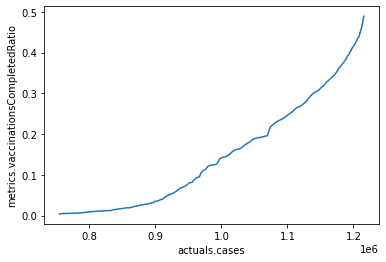

In [83]:
sns.lineplot(data=data, x="actuals.cases", y="metrics.vaccinationsCompletedRatio")

There is a positive relationship between the ratio of people who have been vaccinated and the actual cases. As the actual cases increases, the number of people who complete vaccinationation also icreases.